{'0': (99.0, 234.0), '1': (99.0, 162.0), '2': (27.0, 90.0), '3': (27.0, 18.0), '4': (99.0, 90.0), '5': (99.0, 18.0), '6': (171.0, 90.0), '7': (171.0, 18.0)}


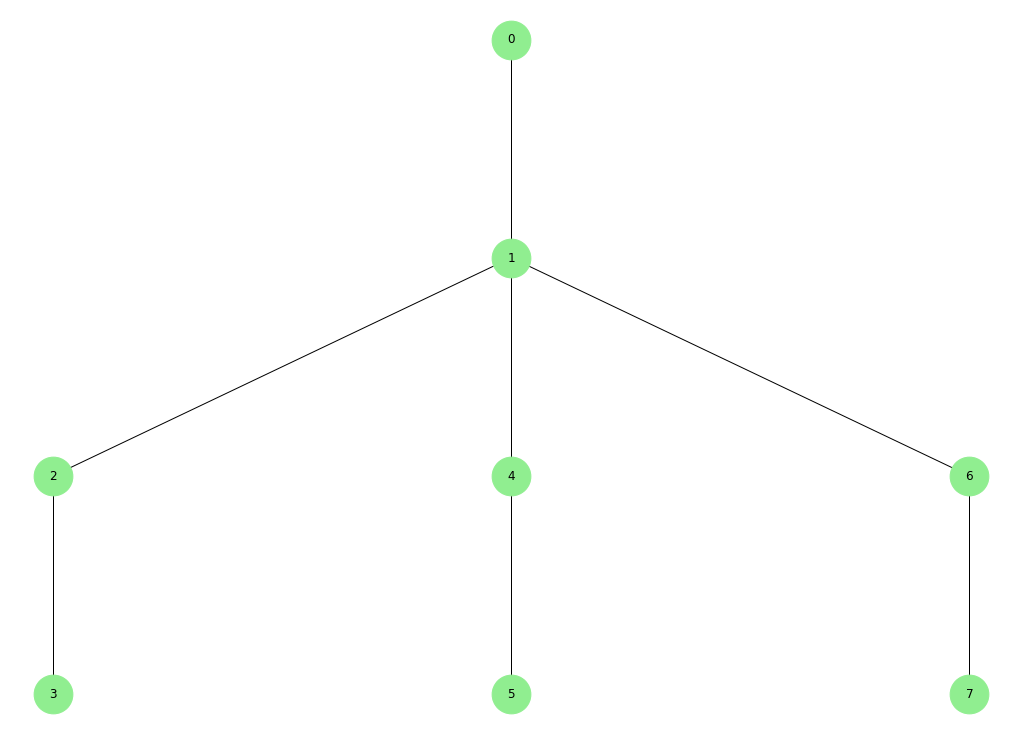

In [15]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pylab import rcParams
import pandas as pd

# df = pd.read_csv....
"0W(1;0)|1W(2,4,6;1)|2W(3;2)|3W(5;4)|4W(7;6)"
# paths = df.loc[:,'BUILDING':].stack().groupby(level=0).agg(list).values.tolist()
paths = [["0", "1", "2", "3"], ["0", "1", "4", "5"], ["0", "1", "6", "7"]]
G = nx.DiGraph()
for path in paths:
    nx.add_path(G, path)

rcParams["figure.figsize"] = 14, 10
pos = graphviz_layout(G, prog="dot", )
nx.draw(
    G, pos=pos, node_color="lightgreen", node_size=1500, with_labels=True, arrows=False, 
)

print(pos)


https://stackoverflow.com/questions/49368341/position-showing-of-labels-with-networkx-graphviz


https://stackoverflow.com/questions/20213956/plot-a-tree-like-graph-with-root-node-at-the-top


https://plotly.com/python/tree-plots/